# Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Processing

In [3]:
# Load the data from csv file to pandas dataframe
car_dataset = pd.read_csv("car data.csv")

In [4]:
# Inspecting the first five rows of the data frame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# Chceking the number of rows and colums
car_dataset.shape

(301, 9)

In [7]:
# Information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Checking for the missing values (No missing values in this dataset)
car_dataset.isnull().sum 

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Car_Name   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Seller_T

In [10]:
# Check the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the Categorical Data

In [13]:
# Encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [14]:
# checking whether encoding has properly done or not
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data and the target

In [17]:
# Name of the car has nothing to do with prediction it is just for the reference so remove it. As selling price is the independent variable we put it in Y
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [18]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting the data into Train and Test Data

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

# Model Training
     
     1.Linear Regression

In [22]:
# Loading the linear regression model
lin_reg_model = LinearRegression()

In [24]:
# Fitting the train data into the Model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evalution

In [39]:
# Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [40]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493706


# Visualize the actual prices and predicted prices

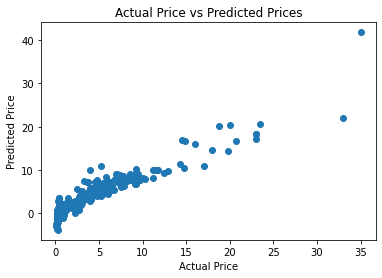

In [28]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [35]:
# Prediction on Testing data
testing_data_prediction = lin_reg_model.predict(X_test)

In [36]:
# R squared Error
error_score_test = metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error : ",error_score_test)

R squared error :  0.8365766715024756


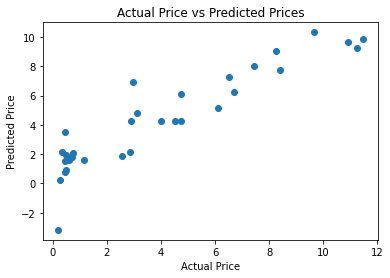

In [41]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

# Lasso Regression

In [42]:
# Loading the Lasso regression model
lass_reg_model = Lasso()

In [43]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

# Model Evaluation

In [44]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [45]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8427856123435794


# Visualize the Actual prices and Predicted prices

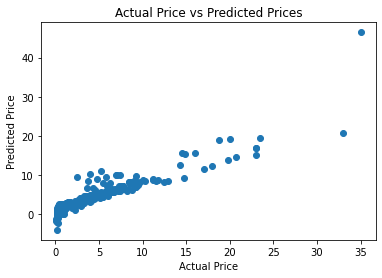

In [47]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [48]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [49]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8709167941173195


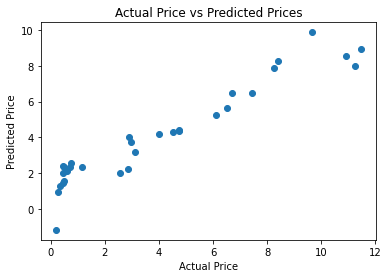

In [50]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()